In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
csv = 'mushroom_encoder1.csv'
mushroom_e = pd.read_csv(csv)
mushroom_e.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,2,1,4,2,3,5,1
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,2,1,4,3,2,1,0
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,2,1,4,3,2,3,0
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,2,1,4,2,3,5,1
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,2,1,0,3,0,1,0


In [3]:
target = mushroom_e["class"]
target_names = ["poisonous", "edible"]

In [4]:
data = mushroom_e.drop("class", axis=1)
feature_names = data.columns
data.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1


In [5]:
data.corr()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
cap-shape,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,0.063794,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,-0.014123,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,-0.456496,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises%3F,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,0.099364,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,0.459766,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,0.186485,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,0.080895,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,0.214576,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,-0.175699,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972
stalk-shape,0.063794,-0.014123,-0.456496,0.099364,0.459766,0.186485,0.080895,0.214576,-0.175699,1.000000,...,0.015193,-0.034399,0.223439,0.235794,0.162604,-0.293221,-0.291444,0.258831,0.087383,-0.269216


In [6]:
X = mushroom_e.iloc[:,0:20]  # all rows, all the features and no labels
y = mushroom_e.iloc[:, 21]  # all rows, label only

In [7]:
#Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

array([[ 1.02971224,  0.14012794, -0.19824983, ...,  0.94808086,
        -0.67019486, -0.5143892 ],
       [ 1.02971224,  0.14012794,  1.76587407, ...,  0.94808086,
        -0.2504706 , -1.31310821],
       [-2.08704716,  0.14012794,  1.37304929, ...,  0.94808086,
        -0.2504706 , -1.31310821],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ...,  0.94808086,
        -1.50964337, -2.11182722],
       [-0.21699152,  0.95327039, -0.19824983, ..., -1.27221574,
         1.42842641,  0.28432981],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.94808086,
         0.16925365, -2.11182722]])

In [8]:
import matplotlib.patches as mpatches

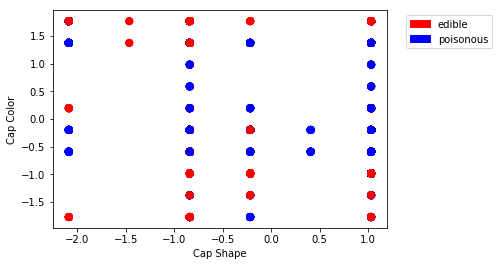

In [9]:
plt.scatter(X[:, 0], X[:, 2], c=mushroom_e["class"], s=50, cmap="bwr");
red_patch = mpatches.Patch(color='red', label='edible')
blue_patch = mpatches.Patch(color='blue', label='poisonous')
plt.legend(handles=[red_patch, blue_patch], bbox_to_anchor=(1.04,1), loc="upper left")
plt.xlabel('Cap Shape')
plt.ylabel('Cap Color')

plt.savefig('cap.jpg', bbox_inches='tight')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [11]:
X = data.iloc[:, ]  # all rows, all the features and no labels
y = data.iloc[:, 20]  # all rows, label only

In [12]:
#Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

In [13]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
#Plotting with mushroom data does not work because it has more than 3 dimensions. Will have to use PCA if we want to plot
# WARNING! BOILERPLATE CODE HERE!
# Plot the decision boundaries
#x_min = X[:, 0].min()
#x_max = X[:, 0].max()
#y_min = X[:, 1].min()
#y_max = X[:, 1].max()

#XX, YY = np.mgrid[x_min:x_max, y_min:y_max]
#Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
#Z = Z.reshape(XX.shape)
# plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
#plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
#            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=100)
#plt.show()

In [15]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.963


In [16]:
# Calculate classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

             precision    recall  f1-score   support

  poisonous       0.97      0.95      0.96      1040
     edible       0.95      0.97      0.96       991

avg / total       0.96      0.96      0.96      2031



In [17]:
tuned_parameters = {
 'C': [1, 10, 100,500, 1000], 'kernel': ['linear','rbf'],
 'C': [1, 10, 100,500, 1000], 'gamma': [1,0.1,0.01,0.001, 0.0001], 'kernel': ['rbf'],
 #'degree': [2,3,4,5,6] , 'C':[1,10,100,500,1000] , 'kernel':['poly']
    }

In [18]:
from sklearn.svm import SVC
svm_model= SVC()

In [22]:
#from sklearn.grid_search import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
model_svm = RandomizedSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy',n_iter=20)

In [ ]:
model_svm.fit(X, y)

In [ ]:
y_pred = model_svm.predict(X_test)

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('auc.jpg')
plt.show()

Support Vector Machine

To test SVM, I used label encoder to convert the string attributes to numbers. Label encoder worked better than the dummies/one hot encoding version. I also used the Standard Scaler because for the number attributes so that a number did not have a higher or "better" value than the other. The Standard Scaler standardizes features by removing the mean and scaling to unit variance.

Linear Discriminative Classifiers did not work because we cannot graph something with 21 dimensions. If we wanted to, we would have to do Principal Component Analysis. But for the purpose of this project, it was not necessary.

The test accuracy is 0.963 using SVM. SVM is a good fit for this dataset. 
